#### Regular lab Question – 3

Instructions:
1. Data Preprocessing:

*   Load the CIFAR-10 dataset.
*   Perform necessary data preprocessing steps:
##### i. Normalize pixel values to range between 0 and 1.
##### ii. Convert class labels into one-hot encoded format.
##### iii. Split the dataset into training and test sets (e.g., 50,000 images for training and 10,000 for testing).
##### iv. Optionally, apply data augmentation techniques (such as random flips, rotations, or shifts) to improve the generalization of the model.

  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels into one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Data shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Data shapes:
X_train: (40000, 32, 32, 3)
X_val: (10000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
y_train: (40000, 10)
y_val: (10000, 10)
y_test: (10000, 10)


2. Network Architecture Design:
##### o Design a feedforward neural network to classify the images.
##### i. Input Layer: The input shape should match the 32x32x3 dimensions of the CIFAR-10 images.
##### ii. Hidden Layers: Use appropriate layers.
##### iii. Output Layer: The final layer should have 10 output neurons (one for each class) with a softmax activation function for multi-class classification.

Question:

o Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

3. Activation Functions:
##### i. Choose any two appropriate activation functions for the hidden layers (e.g., ReLU, sigmoid, or tanh).
##### ii. Explain why you selected a particular activation function and its role in the backpropagation process.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential()

# Input layer (Flattening the 32x32x3 image into a 1D vector)
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden Layer 1: 512 neurons, ReLU activation
model.add(Dense(512, activation='relu'))

# Hidden Layer 2: 256 neurons, Tanh activation
model.add(Dense(256, activation='tanh'))

# Output Layer: 10 neurons for 10 classes, Softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Justification of Network Architecture:

# Number of Layers:
#  2 hidden layers are chosen to provide sufficient complexity for capturing relevant features from the CIFAR-10 images.

# Types of Layers:
#  Dense (fully connected) layers are used as they allow each neuron to be connected to every neuron in the previous layer, enabling the network to learn complex relationships between pixels.

# Number of Neurons/Filters:
#  Layer 1 (512 neurons): A larger number of neurons in the first hidden layer allows the model to learn more complex features from the input images.
#  Layer 2 (256 neurons): The number of neurons gradually decreases in subsequent layers to reduce model complexity and prevent overfitting.
#  Output Layer (10 neurons): This layer has 10 neurons, one for each class in CIFAR-10, with a softmax activation for probability distribution across classes.

In [ ]:
# Activation Functions:

# 1. ReLU (Rectified Linear Unit):
#    Used in the first hidden layer.
#    ReLU helps to overcome the vanishing gradient problem by introducing non-linearity and allowing the network to learn complex patterns.
#    Computationally efficient, avoids the gradient saturation problem often seen with sigmoid/tanh, and typically leads to faster convergence during training.
#    It outputs the input directly if it is positive, otherwise outputs zero. This introduces non-linearity in the network,
#    enabling the model to learn more complex relationships between features.

# 2. Tanh (Hyperbolic Tangent):
#    Used in the second hidden layer.
#    Tanh also introduces non-linearity, and it outputs values between -1 and 1.
#    It helps in faster convergence and better generalization as compared to sigmoid because the output is centered around zero.
#    This helps in mitigating potential bias in the network's learning process.
#    It maps input values to a range between -1 and 1. This helps in normalizing the output and helps gradient descent converge faster.

4. Loss Function and Optimizer:
##### i. Use any two loss functions and compare with the categorical cross entropy since this is a multi-class classification problem.
##### ii. Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain how the learning rate affects the backpropagation process.

Question:

o How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, KLDivergence, CategoricalCrossentropy

# Compile with different loss functions to compare
optim = Adam(learning_rate=0.001)

# 1. Categorical Cross-Entropy Loss
model.compile(optimizer=optim, loss=CategoricalCrossentropy(), metrics=['accuracy'])
print("Model with Categorical Cross-Entropy Loss")
model.summary()

# 2. Mean Squared Error (MSE) Loss
model.compile(optimizer=optim, loss=MeanSquaredError(), metrics=['accuracy'])
print("\nModel with Mean Squared Error Loss")
model.summary()

# 3. Kullback-Leibler Divergence (KL Divergence) Loss
model.compile(optimizer=optim, loss=KLDivergence(), metrics=['accuracy'])
print("\nModel with KL Divergence Loss")
model.summary()

Model with Categorical Cross-Entropy Loss


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


Model with Mean Squared Error Loss


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


Model with KL Divergence Loss


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# The optimizer and learning rate significantly impact network convergence.
# Optimizer:
#   It governs the update of model weights during training.
#   Different optimizers (e.g., Adam, SGD) have unique update rules affecting convergence speed and stability.
# Learning Rate:
#   It controls the step size of weight updates.
#   A high learning rate may lead to overshooting the optimal solution, while a low one may result in slow convergence or getting stuck in local minima.

# If the model is not converging:
#   Decrease the learning rate gradually.
#   Try different optimizers to find the one that fits the model better.
#   Analyze training and validation loss/accuracy to monitor progress.

5. Training the Model:
##### i. Implement backpropagation to update the weights and biases of the network during training.
##### ii. Train the model for a fixed number of epochs (e.g., 50 epochs) and monitor the training and validation accuracy.

Question:

o How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2290 - loss: 2.1603 - val_accuracy: 0.3172 - val_loss: 1.8793
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3510 - loss: 1.7971 - val_accuracy: 0.3855 - val_loss: 1.7034
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4017 - loss: 1.6736 - val_accuracy: 0.4050 - val_loss: 1.6728
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4342 - loss: 1.5792 - val_accuracy: 0.4366 - val_loss: 1.5675
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4571 - loss: 1.5194 - val_accuracy: 0.4490 - val_loss: 1.5343
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4803 - loss: 1.4672 - val_accuracy: 0.4472 - val_loss: 1.5586
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4844 - loss: 1.4393 - val_accuracy: 0.4717 - val_loss: 1.4826
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4944 - loss: 1.4141 - val_accuracy: 0.

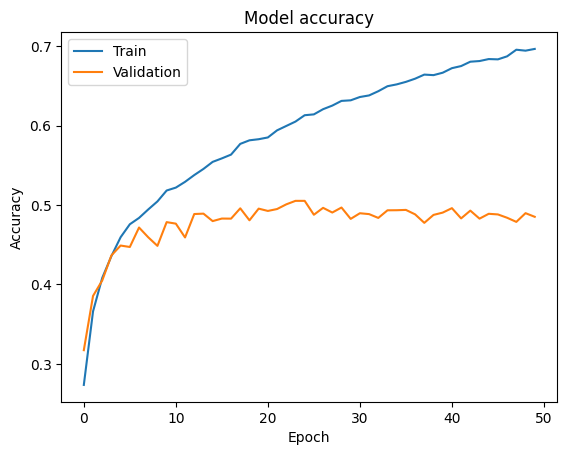

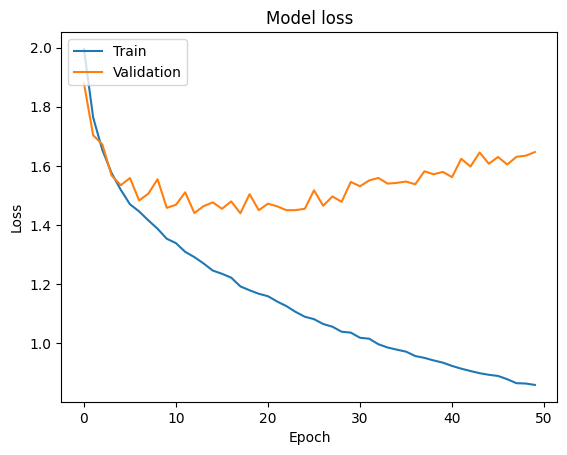

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4833 - loss: 1.6064
Test accuracy: 0.486299991607666


In [ ]:
import matplotlib.pyplot as plt

# Compile the model using categorical cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and monitor training and validation accuracy
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64
)

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Backpropagation updates weights by calculating the gradient of the loss function with respect to each weight.
# The learning rate scales the calculated gradient, determining how much the weights are adjusted during each update.
# A larger learning rate leads to bigger weight changes, while a smaller one results in smaller adjustments.
# This process continues through each layer, adjusting weights to minimize the error and improve the model's accuracy.

6. Model Evaluation:
##### i. After training, evaluate the performance of your model on the test set.
##### ii. Calculate accuracy, precision, recall, F1-score, and the confusion matrix to understand the model’s classification performance.

Question:

o How can you further improve model performance if the accuracy is low?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4833 - loss: 1.6064
Test Loss: 1.6116665601730347
Test Accuracy: 0.486299991607666
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.53      0.58      0.55      1000
  automobile       0.59      0.62      0.61      1000
        bird       0.38      0.37      0.37      1000
         cat       0.30      0.40      0.34      1000
        deer       0.40      0.42      0.41      1000
         dog       0.40      0.38      0.39      1000
        frog       0.63      0.40      0.49      1000
       horse       0.56      0.54      0.55      1000
        ship       0.68      0.60      0.64      1000
       truck       0.52      0.55      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



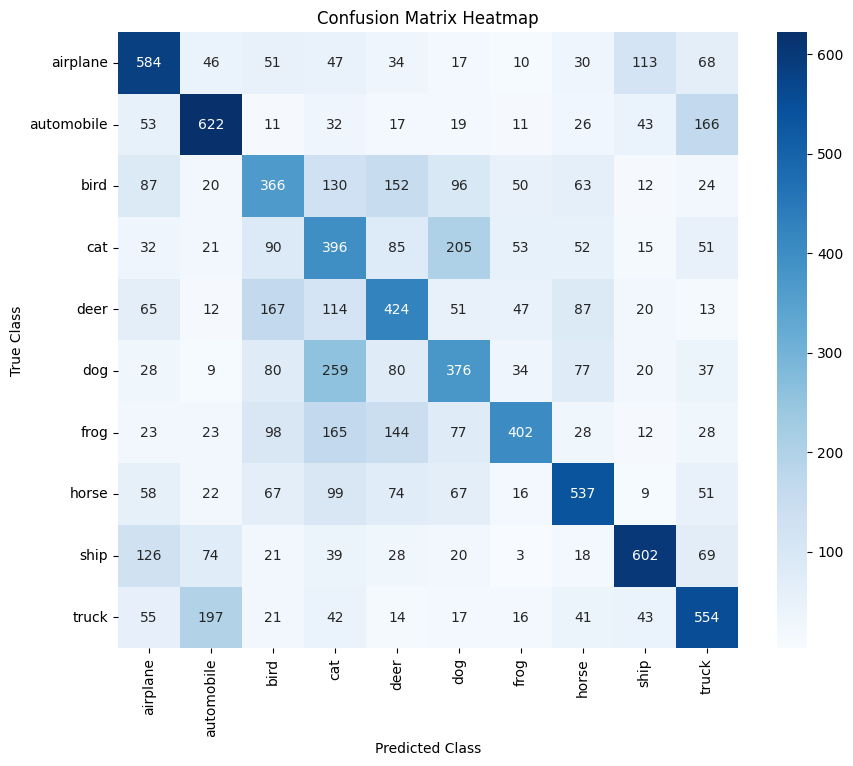

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# To improve model performance if accuracy is low:
# 1. Increase model complexity (more layers, neurons).
# 2. Use more training data or data augmentation.
# 3. Fine-tune hyperparameters (learning rate, batch size, etc.).
# 4. Regularization techniques (dropout, weight decay).
# 5. Explore different activation functions and optimizers.

7. Optimization Strategies:
##### Discuss optimization strategies such as:

##### i. Early stopping to prevent overfitting.
##### ii. Learning rate scheduling for smoother convergence.
##### iii. Weight initialization techniques to ensure efficient learning.

Question:

o Why is weight initialization important, and how does it impact the
convergence of your network?

In [ ]:
# Optimization Strategies:

# i. Early Stopping:
#   Monitor the validation loss during training.
#   If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting.
#   Stop the training process early to prevent the model from memorizing the training data and improve generalization on unseen data.

# ii. Learning Rate Scheduling:
#   Gradually decrease the learning rate during training.
#   This allows for faster initial convergence and fine-tuning in later stages, preventing oscillations around the optimal solution.
#   Examples: Step decay, exponential decay, or cyclical learning rate schedules can be used.

# iii. Weight Initialization:
#   Initialize weights to small random values or use specific initialization techniques (e.g., Xavier/Glorot initialization, He initialization).
#   Proper initialization helps avoid vanishing or exploding gradients, leading to faster and more stable training.
#   It also affects the initial landscape of the optimization process and can impact how quickly the network converges to a good solution.

In [ ]:
# Weight initialization is crucial because it determines the initial state of the network's weights, significantly impacting how quickly and effectively the network learns.
# Poor initialization can lead to vanishing or exploding gradients, causing slow convergence or preventing the network from learning effectively.
# Proper initialization can improve convergence speed and stability by avoiding these problems, allowing the network to learn more efficiently.

8. Report:
##### Provide a detailed report/documentation that includes (in Colab file):
##### i. The architecture of the network and justifications for the choices made.
##### ii. Training and test accuracy with relevant plots showing loss and accuracy over the epochs.
##### iii. Hyperparameter values used (learning rate, batch size, number of epochs, etc.).
##### iv. A brief discussion of the challenges you faced and how you addressed them.

In [ ]:
# Report:

# i. Network Architecture:
#    Input Layer: Flattens 32x32x3 CIFAR-10 images.
#    Hidden Layer 1: 512 neurons with ReLU activation (for non-linearity and avoiding vanishing gradients).
#    Hidden Layer 2: 256 neurons with Tanh activation (for centering output and faster convergence).
#    Output Layer: 10 neurons with Softmax activation (for multi-class probability distribution).

# ii. Training & Test Accuracy:
#    Plots can be observed in previous iterations
#    Train and Validation accuracy and loss over 50 epochs are plotted.
#    Test accuracy is calculated and displayed after training completion.

# iii. Hyperparameters:
#    Learning Rate: 0.001 (default Adam optimizer learning rate)
#    Batch Size: 64
#    Number of Epochs: 50
#    Optimizer: Adam

# iv. Challenges and Solutions:
#    Challenge: Overfitting (validation loss increasing while training loss decreases).
#    Solution: Early stopping can be implemented to stop training before overfitting occurs.
#    Challenge: Slow convergence.
#    Solution: Learning rate scheduling could be used for a smoother convergence.